In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os


In [5]:
if os.path.exists("sales_data.db"):
    os.remove("sales_data.db")

In [7]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [9]:
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")


In [11]:
sample_data = [
    ("Shoes", 10, 50.0),
    ("Shirt", 20, 25.0),
    ("Shoes", 5, 50.0),
    ("Hat", 15, 15.0),
    ("Shirt", 5, 25.0),
    ("Hat", 10, 15.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sample_data)
conn.commit()

In [13]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn)
conn.close()

Sales Summary:
  product  total_qty  revenue
0     Hat         25    375.0
1   Shirt         25    625.0
2   Shoes         15    750.0


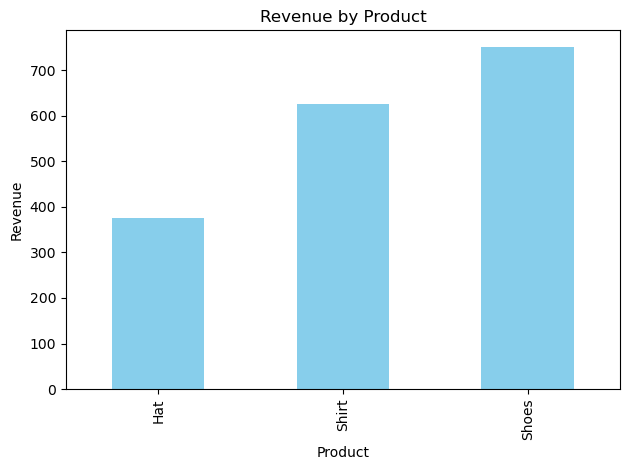

In [15]:
print("Sales Summary:")
print(df)

# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()